# placa Triangular

This is the Laplace equation in 2-D cartesian coordinates (for heat equation)

$$ \frac{\partial^2 T}{\partial^2 x}+\frac{\partial^2 T}{\partial^2 y}=0 $$

Where T is temperature, x is x-dimension, and y is y-dimension. x and y are functions of position in Cartesian coordinates.

Here, we only need to solve 2-D form of the Laplace equation. The problem to solve is shown below:

La ecuación de laplace discretizada queda de la siguiente forma:

$$
T(x,y)=\frac{T(x+1,y) + T(x+1,y) + T(x,y+1) + T(x,y+1)}{4}
$$

importamos las librerias que vamos a necesitar


In [1]:
using Plots

In [49]:
#preparar la matriz
L=33
m=Int64((L-1)/2)
P=zeros(L-m+1,L)
condcon=100
for i in (1:(L-m+1))
    for j in (1:L)
        if(j==(m-i+2) || j==(m+i))
            P[i,j]=50
        end
        if(i==(L-m+1))
            P[i,j]=condcon
        end
    end
end
guess=30
for i in (2:L-m)
    for j in (1:L)
        if(j>(m-i+2) && j<(m+i))
            P[i,j]=guess
        end
    end
end
x=1:L
y=1:L-m+1

1:18

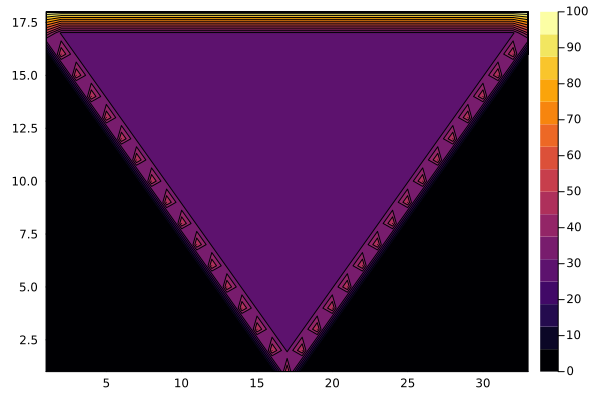

In [50]:
contour(x,y,P,fill = true)

In [51]:
target = 1e-3  # Target accuracy

# Iteration (We assume that the iteration is convergence in maxIter = 500)
cont=1
error=1
diff=zeros(L-m+1,L)
Pcopy=copy(P)
Puni=copy(P)
println("Por favor espere un momento, calculando solución")
@time while error>target
    Pcopy=copy(P)
    for i in (2:L-m)
        for j in (2:L)
            if(j>(m-i+2) && j<(m+i))
                    P[i,j]=0.25*(P[i+1,j] + P[i-1,j] + P[i,j+1] + P[i,j-1])
            end
        end
    end
                    
    for i in (1:L-m)
        for j in (1:L)
            if(j>(m-i) && j<(m+i))
                diff[i,j]=abs(Pcopy[i,j]-P[i,j])
            end
        end
    end
    
    error=maximum(diff)
    cont+=1
    Puni=[Puni P]
end
Ttiempo=reshape(Puni,L-m+1,L,:)
println("Solución calculada")
println("el numero de interacciones fueron:",cont)

Por favor espere un momento, calculando solución
  0.120602 seconds (724.43 k allocations: 97.463 MiB, 15.58% gc time)
Solución calculada
el numero de interacciones fueron:190


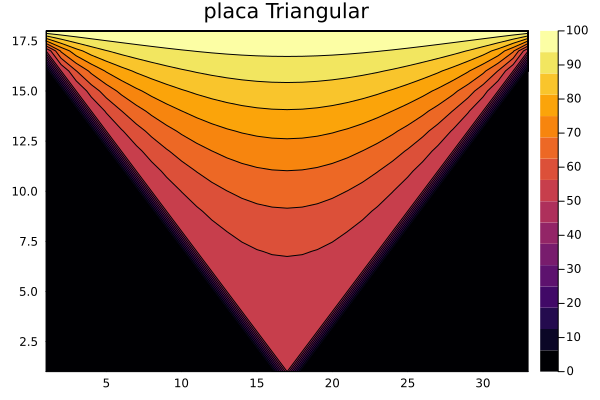

In [52]:
plot(contour(x,y,Ttiempo[:,:,end],fill = true,colorscale="Hot",contours_start=0,contours_end=100,contours_size=10))
title!("placa Triangular")

┌ Info: Saved animation to 
│   fn = C:\Users\juand\computacional II\placa_triangular_fps60.gif
└ @ Plots C:\Users\juand\.julia\packages\Plots\AAjgN\src\animation.jl:139


Plots.AnimatedGif("C:\\Users\\juand\\computacional II\\placa_triangular_fps60.gif")
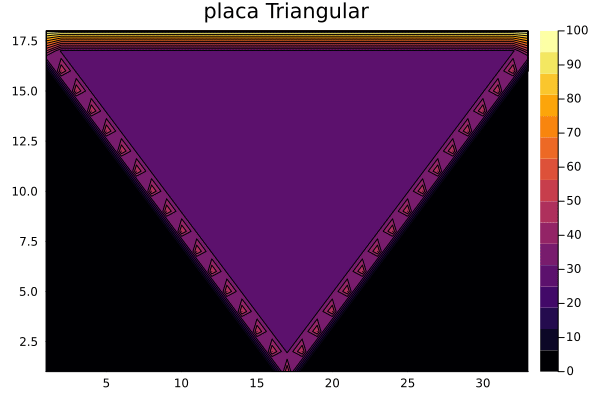

In [54]:
anim = @animate for i in 1:1:length(Ttiempo[1,1,:])
    plot(contour(x,y,Ttiempo[:,:,i],fill = true,colorscale="Hot",contours_start=0,contours_end=100,contours_size=10))
    title!("placa Triangular")
end
gif(anim, "placa_triangular_fps60.gif", fps = 60)